In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
filepath='C://Users//cheth//OneDrive//Desktop//Alabs Docs//Machine learning//case_study//14. Capstone Case Study - Finding-Marketing-Insights (1)//Datasets'
CustomersData=pd.read_excel(filepath+'//CustomersData.xlsx')
Discount_Coupon=pd.read_csv(filepath+'//Discount_Coupon.csv')
Marketing_Spend=pd.read_csv(filepath+'//Marketing_Spend.csv')
Online_Sales=pd.read_csv(filepath+'//Online_Sales.csv')
Tax_amount=pd.read_excel(filepath+'//Tax_amount.xlsx')

In [3]:
CustomersData.info(),
Discount_Coupon.info(),
Marketing_Spend.info(),
Online_Sales.info(),
Tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
-

In [4]:
CustomersData.head(1)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12


In [5]:
Discount_Coupon.head(1)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10


In [6]:
Marketing_Spend.head(1)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.5


In [7]:
Online_Sales.head(1)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [8]:
Tax_amount.head(1)

,Product_Category,GST
0,Nest-USA,0.1


In [9]:
Online_Sales['Transaction_Date']=pd.to_datetime(Online_Sales['Transaction_Date'], format='%Y%m%d')
Online_Sales['Month']=Online_Sales['Transaction_Date'].dt.strftime('%b')

In [10]:
Online_Sales['Transaction_Date']=Online_Sales['Transaction_Date'].dt.date

In [11]:
Online_Sales.head(1)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [16]:
res=pd.merge(left=Online_Sales,right=Discount_Coupon,on=['Month','Product_Category'],how='left')

In [15]:
Discount_Coupon.columns=Discount_Coupon.columns.str.replace(' ','')

In [17]:
res=pd.merge(left=res, right=Tax_amount,on=['Product_Category'],how='left')

In [18]:
# res.isna().sum()
res['Coupon_Code'].fillna('not_available', inplace=True)

In [19]:
res['Discount_pct'].fillna(0,inplace=True)

## 1. Calculate Invoice amount  or sale_amount  or revenue for each transaction and item level 
 Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [20]:
res['invoice']=np.where(res['Coupon_Code']=='Used',((res['Quantity']*res['Avg_Price'])*(1-res['Discount_pct']/100)*(1+res['GST'])+res['Delivery_Charges']),((res['Quantity']*res['Avg_Price'])*(1+res['GST'])+res['Delivery_Charges']))

In [21]:
res.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.755
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.927
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,25.970


## 2. Perform Detailed exploratory analysis 
 Understanding how many customers acquired every month 
 Understand the retention of customers on month on month basis 
 How the revenues from existing/new customers on month on month basis 
 How the discounts playing role in the revenues? 
 Analyse KPI’s like Revenue, number of orders, average order value, number of 
customers (existing/new), quantity, by category, by month, by week, by day etc… 
 Understand the trends/seasonality of sales by category, location, month etc… 
 How number order varies and sales with different days? 
 Calculate the Revenue, Marketing spend, percentage of marketing spend out of 
revenue, Tax, percentage of delivery charges by month. 
 How marketing spend is impacting on revenue? 
 Which product was appeared in the transactions? 
 Which product was purchased mostly based on the quantity?

In [22]:
#  Understanding how many customers acquired every month 
res['Month2'] = pd.to_datetime(res['Month'], format='%b')
res.groupby('Month2')['CustomerID'].count()
cust_acq_mnth=res.groupby('Month2')['CustomerID'].nunique()
cust_acq_mnth

Month2
1900-01-01    215
1900-02-01    109
1900-03-01    208
1900-04-01    224
1900-05-01    200
1900-06-01    259
1900-07-01    236
1900-08-01    300
1900-09-01    193
1900-10-01    210
1900-11-01    188
1900-12-01    236
Name: CustomerID, dtype: int64

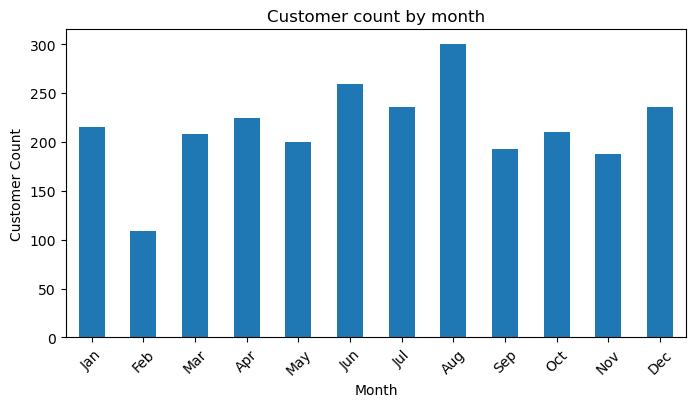

In [23]:
plt.figure(figsize=(8,4))
cust_acq_mnth.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer count by month')
plt.xticks(ticks=range(0,12),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.show()

In [24]:
# Understand the retention of customers on a month-on-month basis
month_dict = {}
for i in res['Month'].unique():
   month_dict[i] = res[res['Month']==i]['CustomerID'].unique().tolist()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention=[0]
for i in range(11):
    set1=set(month_dict[months[i]])
    set2=set(month_dict[months[i+1]])
    common_items=len(set1.intersection(set2))
    retention.append(common_items)
    

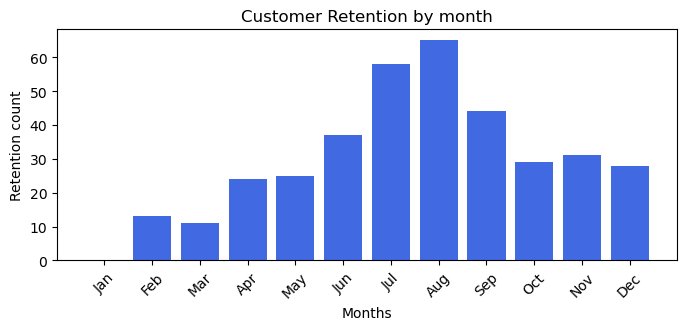

In [25]:
plt.figure(figsize=(8,3))
plt.bar(months,retention,color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention count')
plt.title('Customer Retention by month')
plt.xticks(rotation=45)
plt.show()

In [26]:
# How the revenues from existing/new customers on a month-on-month basis

In [28]:
temp=[]
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

# Iterate over unique months in the DataFrame
for month in res['Month'].unique():
    # Filter the DataFrame for the current month
    month_data = res[res['Month'] == month]

    # Get unique customer IDs for the current month
    unique_customer_ids = month_data['CustomerID'].unique()

    # Separate new and existing customers for the current month
    new_cust = [customer_id for customer_id in unique_customer_ids if customer_id not in temp]
    existing_cust = [customer_id for customer_id in unique_customer_ids if customer_id in temp]

    # Update temp list with current month's customer IDs
    temp.extend(unique_customer_ids)

    # Calculate revenue for new customers for the current month
    new_cust_revenue = month_data[month_data['CustomerID'].isin(new_cust)]['invoice'].sum()
    new_cust_each_month_revenue[month] = new_cust_revenue

    # Calculate revenue for existing customers for the current month
    existing_cust_revenue = month_data[month_data['CustomerID'].isin(existing_cust)]['invoice'].sum()
    existing_cust_each_month_revenue[month] = existing_cust_revenue

# Create lists of months for plotting
months = list(existing_cust_each_month_revenue.keys())


In [29]:
# How the discounts play a role in the revenues
disc_rev=res.groupby('Coupon_Status')['invoice'].sum()

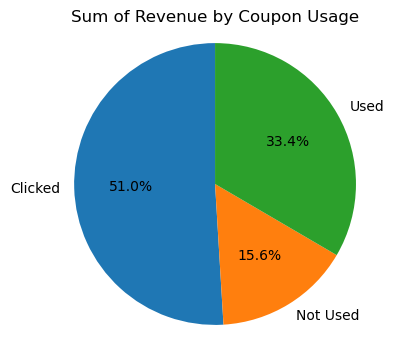

In [30]:
plt.figure(figsize=(4,4))
plt.pie(disc_rev, labels=disc_rev.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Sum of Revenue by Coupon Usage')
plt.show()

In [31]:
# Which product was purchased mostly based on the quantity
prod_quan=res.groupby('Product_SKU')['Quantity'].sum()

In [32]:
top_10_categories = prod_quan.sort_values(ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

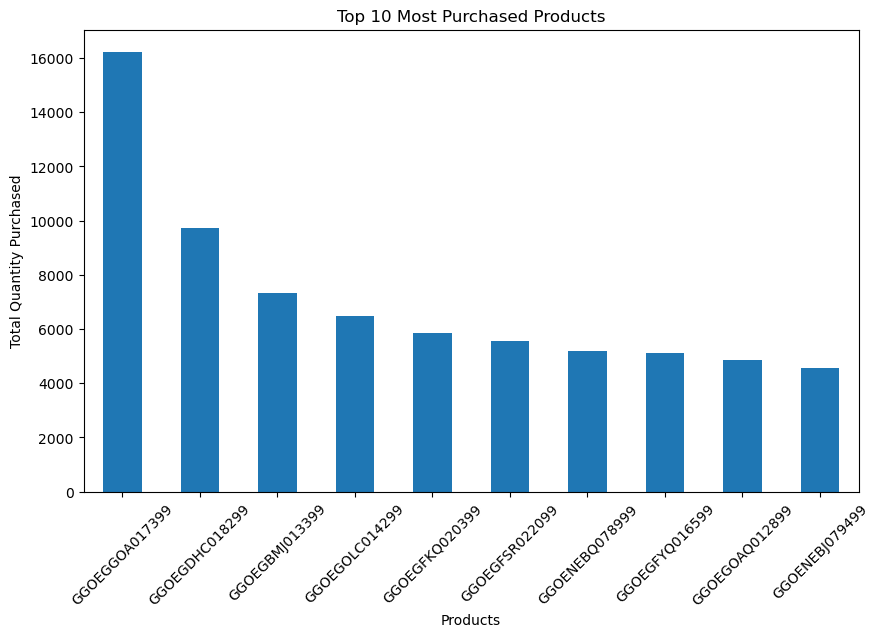

In [33]:
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

In [34]:
# Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [35]:
top_cat_invoice=res.groupby('Product_Category').agg({'invoice':'sum','Quantity':'sum'}).nlargest(5,'Quantity')

In [36]:
top_cat_invoice

,invoice,Quantity
Product_Category,,
Office,4.029218e+05,88383
Apparel,8.744165e+05,32438
Drinkware,2.869634e+05,30501
Lifestyle,1.310113e+05,24881
Nest-USA,2.909263e+06,21430


In [37]:
# Top 5 revenue days
top_days = res.groupby('Transaction_Date')['invoice'].sum().nlargest(5)
print("\nTop 5 revenue days:")
top_days


Top 5 revenue days:


Transaction_Date
2019-04-05    62547.3923
2019-11-27    60669.9790
2019-04-18    55447.1640
2019-08-02    45418.0346
2019-07-18    44000.9491
Name: invoice, dtype: float64

In [38]:
# Top 5 revenue weeks
res['Week'] = res['Month2'].dt.strftime('%Y-%U')
top_weeks = res.groupby('Week')['invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)



Top 5 revenue weeks:
Week
1900-47    611664.9045
1900-43    586700.7202
1900-00    508514.7551
1900-30    506936.6100
1900-39    495627.7185
Name: invoice, dtype: float64


In [39]:
# Top 2 revenue months
top_months = res.groupby('Month2')['invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)



Top 2 revenue months:
Month2
1900-12-01    611664.9045
1900-11-01    586700.7202
Name: invoice, dtype: float64


In [40]:
# understand the trends/seasonality of sales by category, location, month etc… 
#  How number order varies and sales with different days?

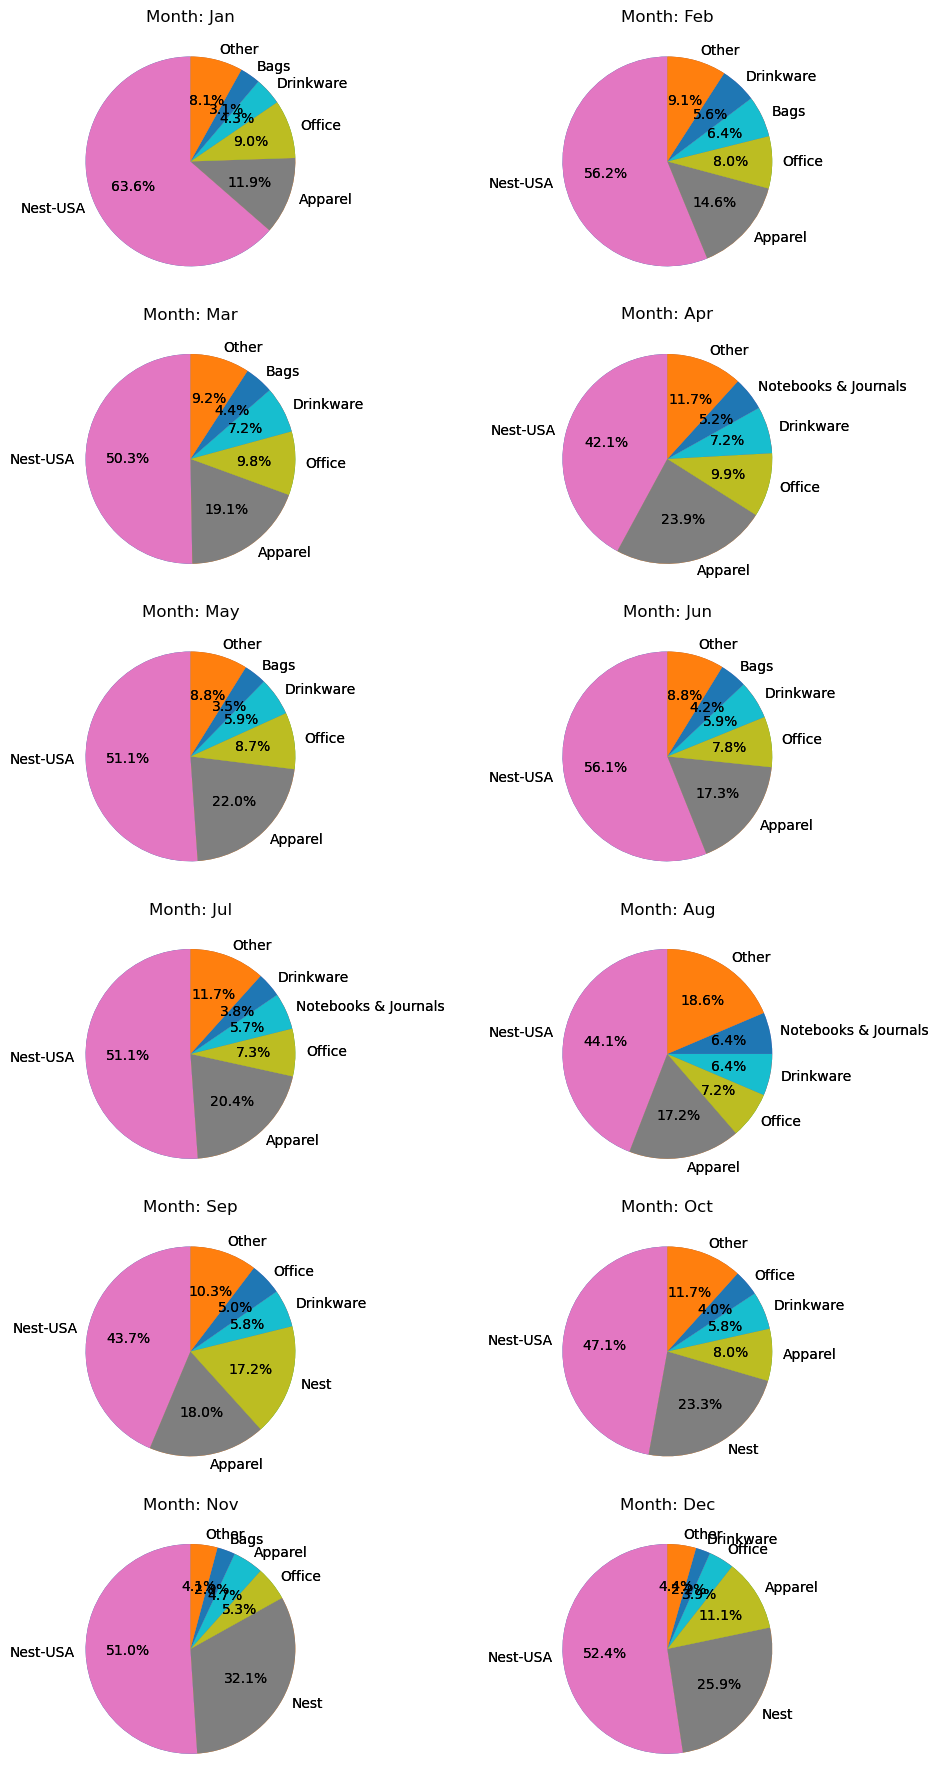

In [41]:
months = res['Month'].unique()
categories = res['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = res[res['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['invoice'].sum()
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort the total_invoice

    if len(total_invoice) > categories_to_show:
      other_sum = total_invoice.iloc[categories_to_show:].sum()
      total_invoice = total_invoice.iloc[:categories_to_show]
      total_invoice['Other'] = other_sum

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.tight_layout()
plt.show()


In [42]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

Marketing_Spend['Date'] = pd.to_datetime(Marketing_Spend['Date'], format='%m/%d/%Y')
Marketing_Spend['Month'] = Marketing_Spend['Date'].dt.strftime('%b')
Marketing_Spend['total_spend'] = Marketing_Spend['Offline_Spend'] + Marketing_Spend['Online_Spend']

x = Marketing_Spend.groupby('Month')['total_spend'].sum().reset_index()
y = res.groupby('Month')['invoice'].sum().reset_index()
z = res.groupby('Month')['Discount_pct'].mean().reset_index()
tax = res.groupby('Month')['GST'].mean().reset_index()
deli_charg = res.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['invoice']

result

,Month,total_spend,invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,492559.7069,9.874699,0.142545,41481.74,31.879755,8.421667
1,Aug,142904.15,506936.6100,19.876423,0.148522,61099.57,28.189747,12.052704
2,Dec,198648.75,611664.9045,30.000000,0.121919,37881.99,32.476728,6.193259
3,Feb,137107.92,396865.6570,19.762485,0.136114,49216.60,34.547691,12.401325
4,Jan,154928.95,508514.7551,9.901551,0.131691,59242.32,30.466953,11.650069
5,Jul,120217.85,465289.0189,9.895258,0.144870,48723.93,25.837242,10.471756
6,Jun,134318.14,397002.9339,29.756737,0.143203,37513.58,33.833035,9.449195
7,Mar,122250.09,453205.0673,29.613438,0.141742,60799.94,26.974564,13.415547
8,May,118259.64,386779.2954,19.755031,0.144845,41396.17,30.575484,10.702789
9,Nov,161144.96,586700.7202,19.979803,0.116425,32311.93,27.466297,5.507396


In [43]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.8341860233346348


## 3. Performing Customer Segmentation 
 Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
Standard customers and define strategy on the same.  
 Scientific (Using K-Means) & Understand the profiles. Define strategy for each 
segment. 

In [44]:
res.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,invoice,Month2,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581,1900-01-01,1900-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581,1900-01-01,1900-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.755,1900-01-01,1900-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.927,1900-01-01,1900-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,25.970,1900-01-01,1900-00


In [45]:
# Importing all classification model libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
# from  xgboost import XGBClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [46]:
# Convert 'Transaction_Date' to Timestamp if needed
res['Transaction_Date'] = pd.to_datetime(res['Transaction_Date'])

# Define the current date
today = pd.to_datetime('2020-01-01')

# Calculate recency, frequency, and monetary value for each customer
segment = res.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'invoice': 'sum'  # Calculate monetary value
})

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]
f_thresholds = [0, 40, 70, 100, float('inf')]
m_thresholds = [0, 4000, 7000, 10000, float('inf')]

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['invoice'], bins=m_thresholds, labels=False) + 1

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']

# Define heuristic segmentation function
def h_segmentation(RFM_Segment):
    if RFM_Segment <= 40:
        return 'Standard'
    elif 40 < RFM_Segment <= 70:
        return 'Silver'
    elif 70 < RFM_Segment <= 90:
        return 'Premium'
    else:
        return 'Gold'

# Apply heuristic segmentation
segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

# Merge segment information back into the original dataset
df = res.merge(segment[['heuristic_segment']], on='CustomerID', how='left')


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [48]:
# Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

features = segment[['Transaction_Date', 'Transaction_ID', 'invoice']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K)
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
segment['kmean_segment'] = kmeans.fit_predict(scaled_features)

segment.head()

,Transaction_Date,Transaction_ID,invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment
CustomerID,,,,,,,,,
12346,108,2,185.6882,2,1,1,31,Standard,0
12347,60,60,16567.9470,1,2,4,34,Standard,3
12348,74,23,1842.8708,1,1,1,21,Standard,0
12350,18,17,1636.2142,1,1,1,21,Standard,0
12356,108,36,2231.7198,2,1,1,31,Standard,0


In [49]:
segment.groupby('kmean_segment')[['Transaction_Date', 'Transaction_ID', 'invoice']].mean()


,Transaction_Date,Transaction_ID,invoice
kmean_segment,,,
0,78.114776,26.323219,2760.730437
1,30.200000,590.400000,74751.530360
2,255.359347,20.695100,2108.922052
3,85.870130,120.883117,13724.424932


In [50]:
# Define labels based on cluster characteristics
def label_clusters(cluster):
    if cluster == 2:
        return 'Premium'
    elif cluster == 3:
        return 'Gold'
    elif cluster == 0:
        return 'Silver'
    else:
        return 'Standard'

# Apply the label_clusters function to assign labels
segment['kmean_segment_label'] = segment['kmean_segment'].apply(label_clusters)
segment.drop(columns='kmean_segment',inplace=True)
segment['heuristic_segment'].value_counts()


Standard    803
Silver      653
Premium      12
Name: heuristic_segment, dtype: int64

In [51]:
segment['kmean_segment_label'].value_counts()


Silver      758
Premium     551
Gold        154
Standard      5
Name: kmean_segment_label, dtype: int64

In [52]:
# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
# First, define a dependent variable with categories low value, medium value, high value using customer revenue Then perform a Classification model

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [54]:
segment['Value_Category'] = pd.cut(segment['invoice'], bins=[0, 1000, 5000, float('inf')],
                              labels=['Low Value', 'Medium Value', 'High Value'])

# Select features and target variable
X = segment[['invoice']]
y = segment['Value_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report)

Accuracy: 1.0
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        85
   Low Value       1.00      1.00      1.00        75
Medium Value       1.00      1.00      1.00       134

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [55]:
# 5. Cross-Selling (Which products are selling together)
# You can perform exploratory analysis & market basket analysis to understand which items can be bundled together

In [58]:
# pip install mlxtend


In [59]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
df.head(4)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,invoice,Month2,Week,heuristic_segment
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581,1900-01-01,1900-00,Premium
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,175.581,1900-01-01,1900-00,Premium
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.755,1900-01-01,1900-00,Premium
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.927,1900-01-01,1900-00,Premium


In [61]:
basket = df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

C:\Users\cheth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Apparel, Drinkware]
8     [Lifestyle, Apparel]
9        [Apparel, Office]
10     [Office, Drinkware]
11     [Lifestyle, Office]
Name: itemsets, dtype: object

In [62]:
frequent_itemsets.values

array([[0.3243685407605443, frozenset({'Apparel'})],
       [0.06164957503690994, frozenset({'Bags'})],
       [0.10071425721240174, frozenset({'Drinkware'})],
       [0.06831331551015522, frozenset({'Lifestyle'})],
       [0.07876780655201308, frozenset({'Nest'})],
       [0.46390806432305176, frozenset({'Nest-USA'})],
       [0.14069670005187343, frozenset({'Office'})],
       [0.04501017517257891, frozenset({'Apparel', 'Drinkware'})],
       [0.03307928654084035, frozenset({'Lifestyle', 'Apparel'})],
       [0.062128406687682054, frozenset({'Apparel', 'Office'})],
       [0.046287059574637884, frozenset({'Office', 'Drinkware'})],
       [0.03511432105662184, frozenset({'Lifestyle', 'Office'})]],
      dtype=object)

In [63]:
# 6. Predicting Next Purchase Day
# (How soon each customer can visit the store, 0-30 days, 30-60 days, 60-90 days, 90+ days)

# For this, we need to create a dependent variable at the customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days, and 90+ days) then build a classification model to predict the next purchase of a given customer

In [64]:
# Filter for repeat customers and calculate average days between transactions
repeat_customers = df.groupby('CustomerID').filter(lambda x: len(x) > 1)
temp = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index()

# Create the dependent variable by categorizing average days
temp['Next_Purchase_Category'] = pd.cut(temp['Transaction_Date'], bins=[-1, 30, 60, 90, float('inf')],
                                                      labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])
temp = pd.merge(segment,temp,on='CustomerID', how = 'right')

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()
temp['heuristic_segment'] = label_encoder.fit_transform(temp['heuristic_segment'])
temp['kmean_segment_label'] = label_encoder.fit_transform(temp['kmean_segment_label'])
temp['Value_Category'] = label_encoder.fit_transform(temp['Value_Category'])

# Split the dataset into features and target variable
X = temp.drop(['Next_Purchase_Category'], axis=1)  # Features
y = temp['Next_Purchase_Category']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Random Forest classifier (you can choose another algorithm)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.99644128113879


In [67]:
# 7. Perform cohort analysis by defining below cohorts
# Customers who started in each month and understand their behavior.
# Which Month cohort has maximum retention?

In [68]:
cohorts = df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0]
retention = cohort_metrics.divide(cohort_size, axis=0)

# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150            492559.7069
Aug                 300            6150            506936.6100
Dec                 236            4502            611664.9045
Feb                 109            3284            396865.6570
Jan                 215            4063            508514.7551
Jul                 236            5251            465289.0189
Jun                 259            4193            397002.9339
Mar                 208            4346            453205.0673
May                 200            4572            386779.2954
Nov                 188            3961            586700.7202
Oct                 210            4164            495627.7185
Sep                 193            4288            440822.4258

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         